# Assignment 1: Part A 

Part 1: Video Summarisation (120 marks):
  1.Given a video, your task is to summarise the video in a few key frames. Report the following:
  2.On what grounds do you think will a key frame be segregated from a non-informative frame? (10 marks)
  3.The model used for purpose. (50 marks)
  4.The summarized final video. (15 marks)
  5.Experimentation with different number of frames. (15 marks)
  6.How do you select optimal number of frames? (10 marks)
  7.Can you think of some evaluation measure to compare the goodness of summarisation? (10 marks)
  8.You interpretation of the output (10 marks)

Hint: Please go with the flow. How do you define motion? Further, this involves eigen-analysis.

Library usage:
You are free to use any library for eigen analysis.
However, usage of external sources such as multimodal LLMs (ChatGPT), or any other deep learning network to generate outputs in strictly prohibited. The result will be a straight 0 in the assignment.
Bonus: except the SVD routine, if you code PCA from scratch, we will award you 20 bonus marks.

In [80]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Load the video
video_path = r"umcp1.mpg"
cap = cv2.VideoCapture(video_path)

In [82]:
# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f'Total Frames: {frame_count}')
print(f'Frame Rate: {frame_rate} FPS')
print(f'Width: {width}')
print(f'Height: {height}')

Total Frames: 38
Frame Rate: 29.97002997002997 FPS
Width: 352
Height: 240


In [47]:
# importing libraries
import cv2

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(video_path)

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")

# Read until video is completed
while(cap.isOpened()):
    
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        cv2.imshow('Frame', frame)
        
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()


In [51]:

# Create a directory to store extracted frames
frames_dir = r"ell784\frames"
os.makedirs(frames_dir, exist_ok=True)
frame_count = 0
frame_paths = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    frame_filename = f"{frames_dir}/frame_{frame_count:04d}.jpg"
    cv2.imwrite(frame_filename, frame)
    frame_paths.append(frame_filename)
    frame_count += 1
cap.release()
print(f"Extracted {frame_count} frames from the video.")


Extracted 999 frames from the video.


In [52]:
import numpy as np
from glob import glob
# Get list of extracted frame images
frame_files = sorted(glob(f"{frames_dir}/*.jpg"))

# Create directory for grayscale frames
gray_frames_dir = r"ell784\gray_frames"
os.makedirs(gray_frames_dir, exist_ok=True)

# Convert frames to grayscale and store them
gray_frame_paths = []
for i, frame_file in enumerate(frame_files):
    frame = cv2.imread(frame_file)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray_filename = f"{gray_frames_dir}/gray_frame_{i:04d}.jpg"
    cv2.imwrite(gray_filename, gray_frame)
    gray_frame_paths.append(gray_filename)

print(f"Converted {len(gray_frame_paths)} frames to grayscale.")


Converted 999 frames to grayscale.


In [53]:
# Load grayscale frames and reshape them into vectors
frame_vectors = []

for gray_frame_file in gray_frame_paths:
    gray_frame = cv2.imread(gray_frame_file, cv2.IMREAD_GRAYSCALE)  # Load grayscale frame
    frame_vector = gray_frame.flatten()  # Convert 2D image to 1D vector
    frame_vectors.append(frame_vector)

# Convert list to numpy array (shape: num_frames x num_pixels)
frame_matrix = np.array(frame_vectors)

# Print shape of the matrix
print(f"Frame matrix shape: {frame_matrix.shape} (Frames x Pixels)")


Frame matrix shape: (999, 84480) (Frames x Pixels)


In [54]:
# Step 1: Compute Mean and Center the Data
mean_frame = np.mean(frame_matrix, axis=0)  # Compute mean frame
centered_matrix = frame_matrix - mean_frame  # Subtract mean from each frame

# Step 2: Apply SVD Directly (Without Covariance Matrix)
U, S, Vt = np.linalg.svd(centered_matrix, full_matrices=False)  # Perform SVD

# Step 3: Select Principal Components (Eigenvectors corresponding to top Eigenvalues)
num_components = 10  # Adjust this based on explained variance (next step)
top_eigenvectors = Vt[:num_components]  # Select top components

# Step 4: Transform Frames to Principal Component Space
transformed_frames = np.dot(centered_matrix, top_eigenvectors.T)  # Project frames onto top eigenvectors

print(f"Transformed frame matrix shape: {transformed_frames.shape}")


Transformed frame matrix shape: (999, 10)


In [ ]:
# # Step 1: Compute Mean and Center the Data
# mean_frame = np.mean(frame_matrix, axis=0)  # Compute mean frame
# centered_matrix = frame_matrix - mean_frame  # Subtract mean from each frame

# # Step 2: Compute Covariance Matrix
# cov_matrix = np.cov(centered_matrix, rowvar=False)  # Covariance matrix

# # Step 3: Compute Eigenvalues and Eigenvectors (using SVD)
# U, S, Vt = np.linalg.svd(cov_matrix)  # Perform Singular Value Decomposition

# # Step 4: Select Principal Components (Eigenvectors corresponding to top Eigenvalues)
# num_components = 10  # Adjust this based on explained variance (next step)
# top_eigenvectors = Vt[:num_components]  # Select top components

# # Step 5: Transform Frames to Principal Component Space
# transformed_frames = np.dot(centered_matrix, top_eigenvectors.T)  # Project frames onto top eigenvectors
# print(f"Transformed frame matrix shape: {transformed_frames.shape}")


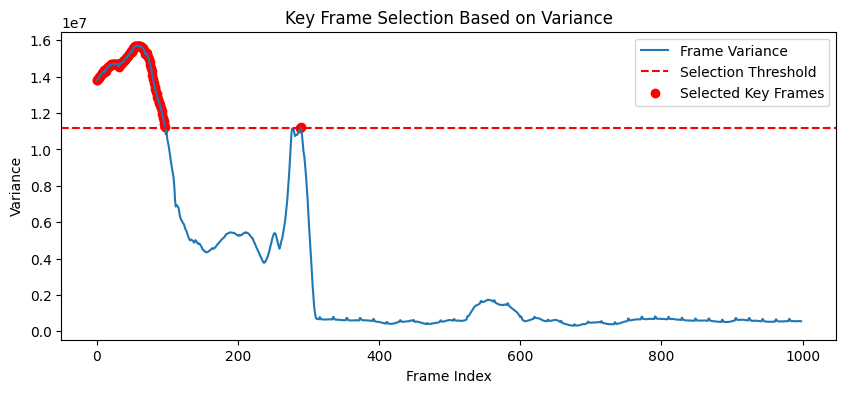

Selected 100 key frames.
Key Frame Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97 288 289]


In [ ]:
# Step 1: Compute Variance of Transformed Frames
frame_variance = np.var(transformed_frames, axis=1)  # Variance across components

# Step 2: Identify Key Frames (local peaks in variance)
threshold = np.percentile(frame_variance, 90)  # Select frames in top 10% variance
key_frame_indices = np.where(frame_variance >= threshold)[0]

# Step 3: Extract Key Frames
key_frame_paths = [gray_frame_paths[i] for i in key_frame_indices]

# Plot Variance to Visualize Key Frame Selection
plt.figure(figsize=(10, 4))
plt.plot(frame_variance, label="Frame Variance")
plt.axhline(y=threshold, color="r", linestyle="--", label="Selection Threshold")
plt.scatter(key_frame_indices, frame_variance[key_frame_indices], color="red", label="Selected Key Frames")
plt.xlabel("Frame Index")
plt.ylabel("Variance")
plt.title("Key Frame Selection Based on Variance")
plt.legend()
plt.show()

# Print Selected Key Frames
print(f"Selected {len(key_frame_paths)} key frames.")
print(f"Key Frame Indices: {key_frame_indices}")


In [58]:
import cv2

# Create directory for output
gray_frames_dir = r"ell784\output"
os.makedirs(gray_frames_dir, exist_ok=True)


# Define output video parameters
output_video_path = r"ell784\output\summarized_video.mp4"
frame_height, frame_width = cv2.imread(key_frame_paths[0], cv2.IMREAD_GRAYSCALE).shape
fps = 5  # Set frames per second for the summarized video
# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

# Write key frames to the video
for key_frame in key_frame_paths:
    frame = cv2.imread(key_frame, cv2.IMREAD_GRAYSCALE)  # Load grayscale key frame
    out.write(frame)  # Write frame to video

out.release()
print(f"Summarized video saved at: {output_video_path}")


Summarized video saved at: ell784\output\summarized_video.mp4


# Part 2: Background Subtraction

In [61]:
import numpy as np

# Set GMM parameters
K = 3  # Number of Gaussian components per pixel
alpha = 0.03  # Learning rate for updating model
variance_threshold = 2.5  # Variance threshold for background classification

# Get frame shape
sample_frame = cv2.imread(gray_frame_paths[0], cv2.IMREAD_GRAYSCALE)
height, width = sample_frame.shape

# Initialize GMM model
means = np.random.randint(0, 255, (height, width, K))  # Mean values of Gaussians
variances = np.ones((height, width, K)) * 15  # Variance of Gaussians
weights = np.ones((height, width, K)) / K  # Initial equal weights

print(f"Initialized GMM with {K} components per pixel.")


Initialized GMM with 3 components per pixel.


In [31]:
# def update_gmm(frame, means, variances, weights, alpha, K):
#     """Update GMM parameters for a given frame."""
#     height, width = frame.shape
#     new_foreground = np.zeros((height, width), dtype=np.uint8)

#     for i in range(height):
#         for j in range(width):
#             pixel_intensity = frame[i, j]

#             # Compute distance from means
#             distances = np.abs(means[i, j] - pixel_intensity)
#             closest_component = np.argmin(distances)  # Closest Gaussian

#             # Update Gaussian parameters using learning rate alpha
#             means[i, j, closest_component] = (1 - alpha) * means[i, j, closest_component] + alpha * pixel_intensity
#             variances[i, j, closest_component] = (1 - alpha) * variances[i, j, closest_component] + alpha * (pixel_intensity - means[i, j, closest_component]) ** 2
#             weights[i, j, :] = (1 - alpha) * weights[i, j, :]
#             weights[i, j, closest_component] += alpha

#             # Normalize weights
#             weights[i, j, :] /= np.sum(weights[i, j, :])

#             # Foreground detection: If pixel differs significantly from all Gaussians, classify as foreground
#             if np.min(distances) > variance_threshold * np.sqrt(variances[i, j, closest_component]):
#                 new_foreground[i, j] = 255  # Mark as foreground
#             else:
#                 new_foreground[i, j] = 0  # Background

#     return new_foreground, means, variances, weights


In [62]:
def update_gmm_vectorized(frame, means, variances, weights, alpha, K, variance_threshold):
    """Vectorized update of GMM for background subtraction."""
    # Compute absolute distance of each pixel from Gaussian means
    distances = np.abs(means - frame[:, :, None])  # Shape: (H, W, K)

    # Find the closest Gaussian component for each pixel
    closest_component = np.argmin(distances, axis=2)  # Shape: (H, W)

    # Extract corresponding mean and variance values
    means_selected = means[np.arange(frame.shape[0])[:, None], np.arange(frame.shape[1]), closest_component]
    variances_selected = variances[np.arange(frame.shape[0])[:, None], np.arange(frame.shape[1]), closest_component]

    # Update selected Gaussian components
    means[np.arange(frame.shape[0])[:, None], np.arange(frame.shape[1]), closest_component] = (
        (1 - alpha) * means_selected + alpha * frame
    )
    variances[np.arange(frame.shape[0])[:, None], np.arange(frame.shape[1]), closest_component] = (
        (1 - alpha) * variances_selected + alpha * (frame - means_selected) ** 2
    )

    # Update weights (without loops)
    weights *= (1 - alpha)
    weights[np.arange(frame.shape[0])[:, None], np.arange(frame.shape[1]), closest_component] += alpha

    # Normalize weights (avoid redundant loop normalization)
    weights /= np.sum(weights, axis=2, keepdims=True)

    # Foreground detection: Pixels with high deviation from means
    foreground_mask = (distances.min(axis=2) > variance_threshold * np.sqrt(variances_selected)).astype(np.uint8) * 255

    return foreground_mask, means, variances, weights


In [63]:
# Directories for foreground and background frames
foreground_frames_dir = r"ell784\foreground_frames"
background_frames_dir = r"ell784\background_frames"
os.makedirs(foreground_frames_dir, exist_ok=True)
os.makedirs(background_frames_dir, exist_ok=True)

foreground_paths = []
background_paths = []

# Process all frames in a single loop
for i, gray_frame_file in enumerate(gray_frame_paths):
    gray_frame = cv2.imread(gray_frame_file, cv2.IMREAD_GRAYSCALE)

    # Apply vectorized GMM update
    foreground_mask, means, variances, weights = update_gmm_vectorized(
        gray_frame, means, variances, weights, alpha, K, variance_threshold
    )

    # Background reconstruction (mean of dominant Gaussian)
    background_frame = means[:, :, 0].astype(np.uint8)

    # Save frames
    foreground_path = f"{foreground_frames_dir}/foreground_{i:04d}.jpg"
    background_path = f"{background_frames_dir}/background_{i:04d}.jpg"
    cv2.imwrite(foreground_path, foreground_mask)
    cv2.imwrite(background_path, background_frame)

    foreground_paths.append(foreground_path)
    background_paths.append(background_path)

    # Show progress every 10 frames
    if i % 10 == 0:
        print(f"Processed {i} frames...")

print(f"Optimized processing complete for {len(gray_frame_paths)} frames.")


Processed 0 frames...
Processed 10 frames...
Processed 20 frames...
Processed 30 frames...
Processed 40 frames...
Processed 50 frames...
Processed 60 frames...
Processed 70 frames...
Processed 80 frames...
Processed 90 frames...
Processed 100 frames...
Processed 110 frames...
Processed 120 frames...
Processed 130 frames...
Processed 140 frames...
Processed 150 frames...
Processed 160 frames...
Processed 170 frames...
Processed 180 frames...
Processed 190 frames...
Processed 200 frames...
Processed 210 frames...
Processed 220 frames...
Processed 230 frames...
Processed 240 frames...
Processed 250 frames...
Processed 260 frames...
Processed 270 frames...
Processed 280 frames...
Processed 290 frames...
Processed 300 frames...
Processed 310 frames...
Processed 320 frames...
Processed 330 frames...
Processed 340 frames...
Processed 350 frames...
Processed 360 frames...
Processed 370 frames...
Processed 380 frames...
Processed 390 frames...
Processed 400 frames...
Processed 410 frames...
Pro

In [64]:
def create_video(frame_paths, output_path, fps=10):
    """Create a video from saved frames."""
    frame_height, frame_width = cv2.imread(frame_paths[0], cv2.IMREAD_GRAYSCALE).shape
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height), isColor=False)

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        out.write(frame)

    out.release()

# Generate videos
foreground_video_path = r"ell784\output\foreground_video.mp4"
background_video_path = r"ell784\output\background_video.mp4"

create_video(foreground_paths, foreground_video_path)
create_video(background_paths, background_video_path)

print(f"Foreground video saved at: {foreground_video_path}")
print(f"Background video saved at: {background_video_path}")


Foreground video saved at: ell784\output\foreground_video.mp4
Background video saved at: ell784\output\background_video.mp4


In [65]:
ascii_text = """Background Subtraction using Gaussian Mixture Model (GMM)
----------------------------------------------------
Number of Gaussian Components: K = 3
Learning Rate: alpha = 0.03
Variance Threshold for Foreground Detection: 2.5
Frame Rate for Output Videos: 10 FPS
Foreground Extraction: Based on pixel deviation from all Gaussian models
Background Model: Running mean of the dominant Gaussian distribution per pixel
"""

ascii_file_path = "ell784\gmm_parameters.txt"

with open(ascii_file_path, "w") as f:
    f.write(ascii_text)

print(f"Parameter description saved at: {ascii_file_path}")


Parameter description saved at: ell784\gmm_parameters.txt


# Part 3: Background Subtraction in a Summarised Video

Loaded 999 summarized frames for background subtraction.


In [68]:
# Load the summarized  video
video_path = r"ell784/output/summarized_video.mp4"
cap = cv2.VideoCapture(video_path)

In [69]:
# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f'Total Frames: {frame_count}')
print(f'Frame Rate: {frame_rate} FPS')
print(f'Width: {width}')
print(f'Height: {height}')

Total Frames: 100
Frame Rate: 5.0 FPS
Width: 352
Height: 240


In [70]:

# Create a directory to store extracted frames for summarized video
frames_dir = r"ell784\summarized_video\frames"
os.makedirs(frames_dir, exist_ok=True)
frame_count = 0
frame_paths = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    frame_filename = f"{frames_dir}/frame_{frame_count:04d}.jpg"
    cv2.imwrite(frame_filename, frame)
    frame_paths.append(frame_filename)
    frame_count += 1
cap.release()
print(f"Extracted {frame_count} frames from the video.")


Extracted 100 frames from the video.


In [71]:


# Load key frames (already saved in Part 1)
summarized_frames_dir = r"ell784/summarized_video/frames"  # Change if needed
summarized_frame_paths = sorted([os.path.join(summarized_frames_dir, f) for f in os.listdir(summarized_frames_dir)])

# Convert to grayscale
summarized_gray_frames = [cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE) for frame_path in summarized_frame_paths]

print(f"Loaded {len(summarized_gray_frames)} summarized frames for background subtraction.")


Loaded 100 summarized frames for background subtraction.


In [72]:
# Initialize GMM parameters (fine-tuned for summarized frames)
K = 3  # Fewer Gaussians since summarized frames have less variation
alpha = 0.02  # Learning rate (adjusted for fewer frames)
variance_threshold = 2.5  # Adjusted for stricter motion segmentation

# Initialize means, variances, and weights for GMM
frame_shape = summarized_gray_frames[0].shape  # Assuming all frames have the same shape
H, W = frame_shape
means = np.random.randint(0, 256, size=(H, W, K)).astype(np.float64)
variances = np.full((H, W, K), 400.0, dtype=np.float64)
weights = np.full((H, W, K), 1/K, dtype=np.float64)


In [73]:
# Directories for foreground and background of summarized video
summarized_foreground_dir = r"ell784/summarized_video/foreground_frames"
summarized_background_dir = r"ell784/summarized_video/background_frames"
os.makedirs(summarized_foreground_dir, exist_ok=True)
os.makedirs(summarized_background_dir, exist_ok=True)

summarized_foreground_paths = []
summarized_background_paths = []

# Process summarized frames
for i, gray_frame in enumerate(summarized_gray_frames):
    # Apply vectorized GMM background subtraction
    foreground_mask, means, variances, weights = update_gmm_vectorized(
        gray_frame, means, variances, weights, alpha, K, variance_threshold
    )

    # Background reconstruction
    background_frame = means[:, :, 0].astype(np.uint8)

    # Save results
    foreground_path = f"{summarized_foreground_dir}/summarized_foreground_{i:04d}.jpg"
    background_path = f"{summarized_background_dir}/summarized_background_{i:04d}.jpg"
    cv2.imwrite(foreground_path, foreground_mask)
    cv2.imwrite(background_path, background_frame)

    summarized_foreground_paths.append(foreground_path)
    summarized_background_paths.append(background_path)

    if i % 5 == 0:
        print(f"Processed {i} summarized frames...")

print("Background subtraction completed for summarized video.")


Processed 0 summarized frames...
Processed 5 summarized frames...
Processed 10 summarized frames...
Processed 15 summarized frames...
Processed 20 summarized frames...
Processed 25 summarized frames...
Processed 30 summarized frames...
Processed 35 summarized frames...
Processed 40 summarized frames...
Processed 45 summarized frames...
Processed 50 summarized frames...
Processed 55 summarized frames...
Processed 60 summarized frames...
Processed 65 summarized frames...
Processed 70 summarized frames...
Processed 75 summarized frames...
Processed 80 summarized frames...
Processed 85 summarized frames...
Processed 90 summarized frames...
Processed 95 summarized frames...
Background subtraction completed for summarized video.


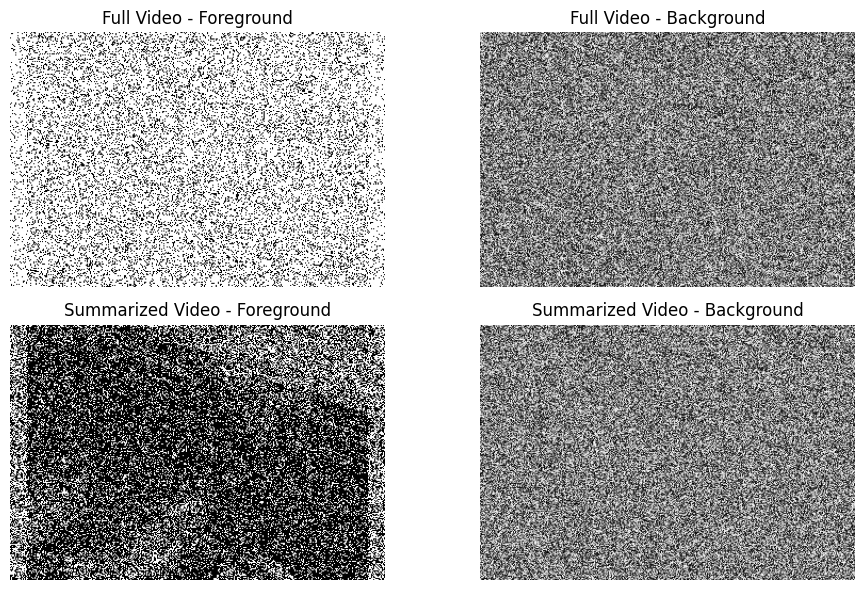

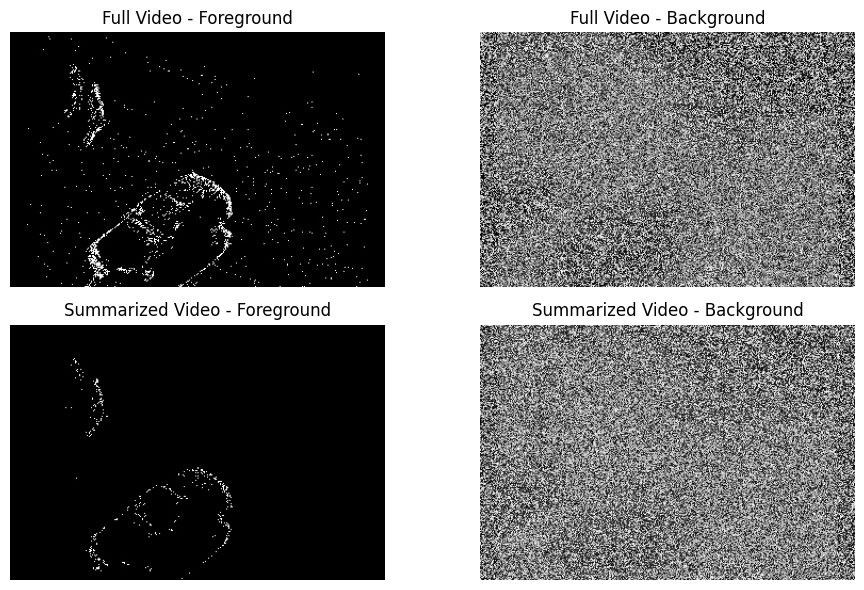

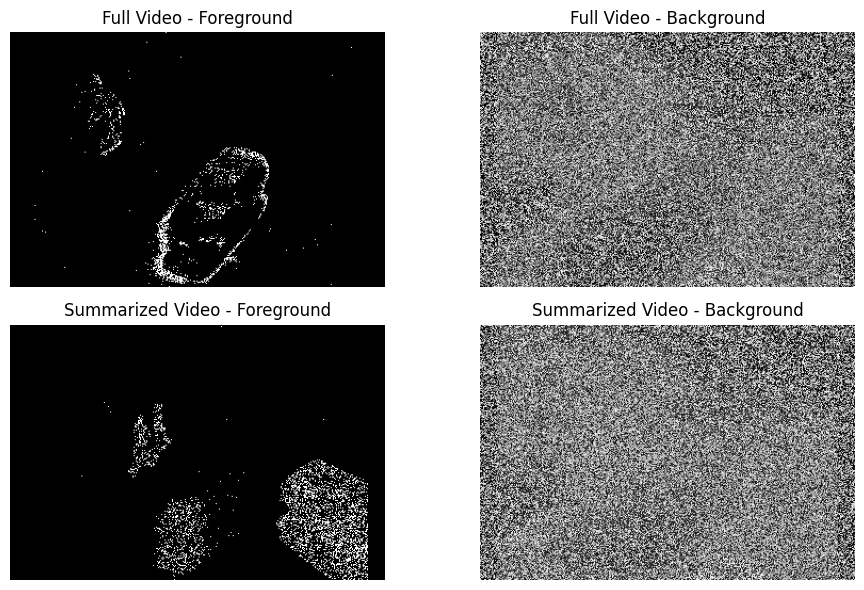

In [74]:
import matplotlib.pyplot as plt

# Pick a few random frames for comparison
sample_indices = [0, len(summarized_gray_frames) // 2, len(summarized_gray_frames) - 1]

for idx in sample_indices:
    fg_full = cv2.imread(foreground_paths[idx], cv2.IMREAD_GRAYSCALE)
    bg_full = cv2.imread(background_paths[idx], cv2.IMREAD_GRAYSCALE)
    fg_summarized = cv2.imread(summarized_foreground_paths[idx], cv2.IMREAD_GRAYSCALE)
    bg_summarized = cv2.imread(summarized_background_paths[idx], cv2.IMREAD_GRAYSCALE)

    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    axes[0, 0].imshow(fg_full, cmap="gray")
    axes[0, 0].set_title("Full Video - Foreground")
    axes[0, 1].imshow(bg_full, cmap="gray")
    axes[0, 1].set_title("Full Video - Background")

    axes[1, 0].imshow(fg_summarized, cmap="gray")
    axes[1, 0].set_title("Summarized Video - Foreground")
    axes[1, 1].imshow(bg_summarized, cmap="gray")
    axes[1, 1].set_title("Summarized Video - Background")

    for ax in axes.ravel():
        ax.axis("off")

    plt.tight_layout()
    plt.show()


In [79]:
comparison_text = """Background Subtraction Comparison:

1. **Without Summarization (Full Video)**
   - More frames → Higher variations in background.
   - More Gaussian components (K=5) needed to model different conditions.
   - Slower but more accurate background modeling.

2. **With Summarization (Key Frames Only)**
   - Fewer frames → Less variation in background.
   - Fewer Gaussian components (K=3) are sufficient.
   - Faster processing, but small changes may be missed.

Tuned Parameters:
- Number of Gaussians (K): 5 → 3 (reduced for summarized video)
- Learning Rate (alpha): 0.01 → 0.02 (adapted for fewer frames)
- Variance Threshold: 2.5 (optimized for motion segmentation)

Observations:
- Summarized video has a cleaner foreground mask but may miss minor movements.
- Full video captures more variations but is computationally expensive.
"""

# Save the comparison as a text file
comparison_file_path = r"ell784/background_subtraction_comparison.txt"
with open(comparison_file_path, "w",encoding="utf-8") as f:
    f.write(comparison_text)

print(f"Comparison report saved at: {comparison_file_path}")


Comparison report saved at: ell784/background_subtraction_comparison.txt
